In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/bitcoin.csv')

In [3]:
df.shape

(2016354, 8)

In [4]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,1541894160,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,1541894220,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,1541894280,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,1541894340,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,1541894400,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

In [6]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,2018-11-10 23:56:00,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,2018-11-10 23:57:00,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,2018-11-10 23:58:00,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,2018-11-10 23:59:00,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,2018-11-11 00:00:00,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [7]:
df.set_index('Timestamp', inplace=True)

In [9]:
df = df.resample('D').mean()

In [10]:
df_month = df.resample('M').mean()

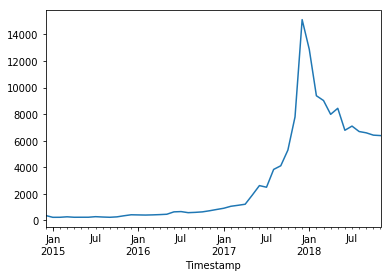

In [12]:
df_month['Weighted_Price'].plot()